In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import scipy.ndimage

import improc

In [9]:
rcParams['figure.figsize'] = 16,8

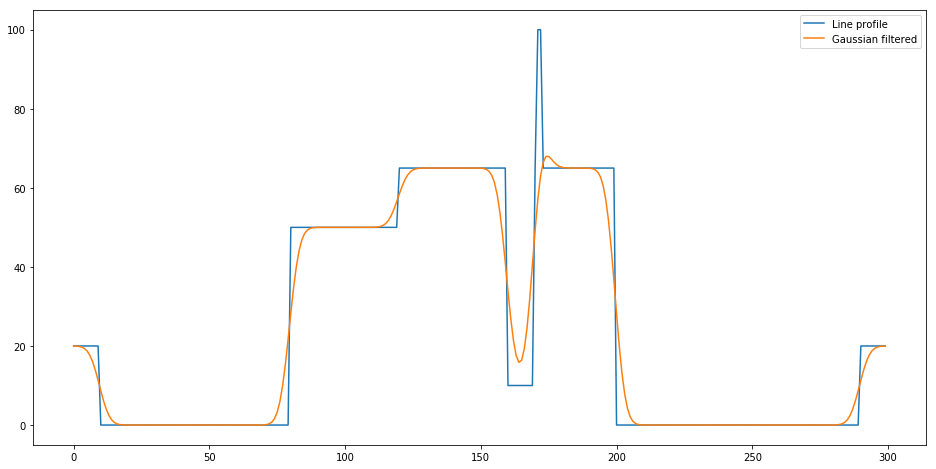

In [11]:
def makeLine():
    out = np.hstack([np.zeros(100),65*np.ones(100),np.zeros(100)])
    return out

line = makeLine().astype(np.float)
line[:10] = 20
line[-10:] = 20
line[80:120]=50
line[160:170]=10
line[171:173]=100
plot(line, label="Line profile")
line = scipy.ndimage.gaussian_filter1d(line, 3.0)
plot(line, label="Gaussian filtered")
legend();

In [13]:
# Compute gradient and laplacian, find edges (laplacian crossings)
grad, lapl, edges = improc.find_laplacian_edges(line, 1.0)
print("Edge candidates:", edges)

Edge candidates: [10, 80, 109, 120, 160, 170, 177, 185, 200, 290]


peak, valley =  175 164


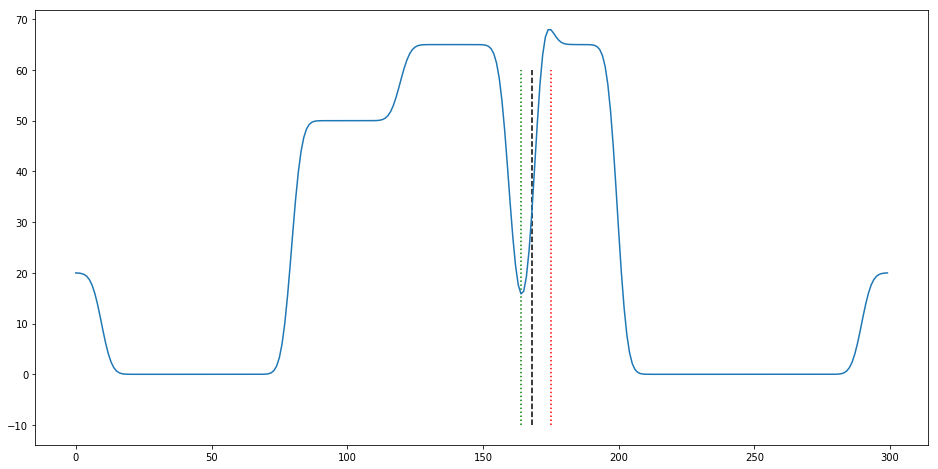

In [16]:
# In non-mock code it would be appropriate to iterate over edges:
# loc = edges[1]

# x coordinate where we suspect an edge
loc = 168

# Now travel along line profile's gradient until we come to a bend in a different direction
peak, valley = improc.follow_edge(grad, loc)
print('peak, valley = ',peak, valley)

plt.plot(line)
plt.vlines(x=loc, ymin=-10,ymax=60, color='k', linestyle='dashed')
plt.vlines(x=peak,ymin=-10,ymax=60, color='r', linestyle='dotted')
plt.vlines(x=valley,ymin=-10,ymax=60, color='g', linestyle='dotted');

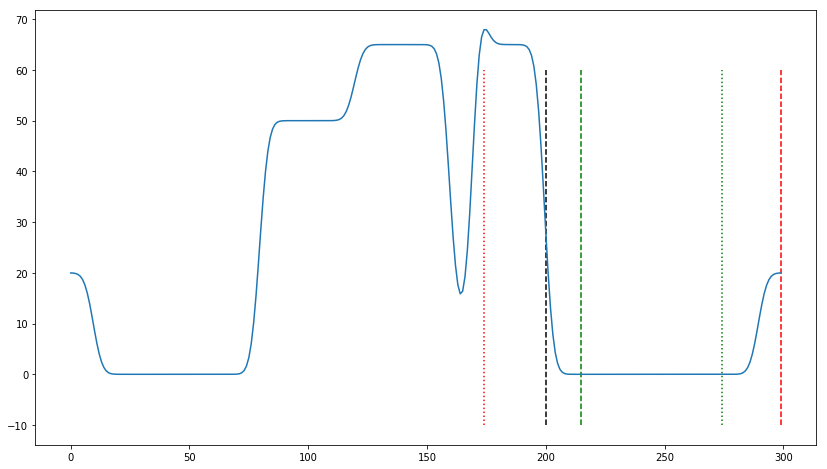

In [17]:
def trench(grad, loc):
    peak_1, valley_1 = improc.follow_edge(grad, loc)
    if peak_1-valley_1 > 0:
        loc2 = valley_1 - 1
    else:
        loc2 = valley_1 + 1
    peak_2, valley_2 = improc.follow_edge(grad, loc2)
    return peak_1, peak_2, valley_1, valley_2

loc = 200
p1, p2, v1, v2 = trench(grad, loc)

figure(figsize=(14,8))
plt.plot(line)
plt.vlines(x=loc, ymin=-10,ymax=60, color='k', linestyle='dashed')

plt.vlines(x=p1,ymin=-10,ymax=60, color='r', linestyle='dotted')
plt.vlines(x=p2,ymin=-10,ymax=60, color='r', linestyle='dashed')

plt.vlines(x=v1,ymin=-10,ymax=60, color='g', linestyle='dotted')
plt.vlines(x=v2,ymin=-10,ymax=60, color='g', linestyle='dashed');

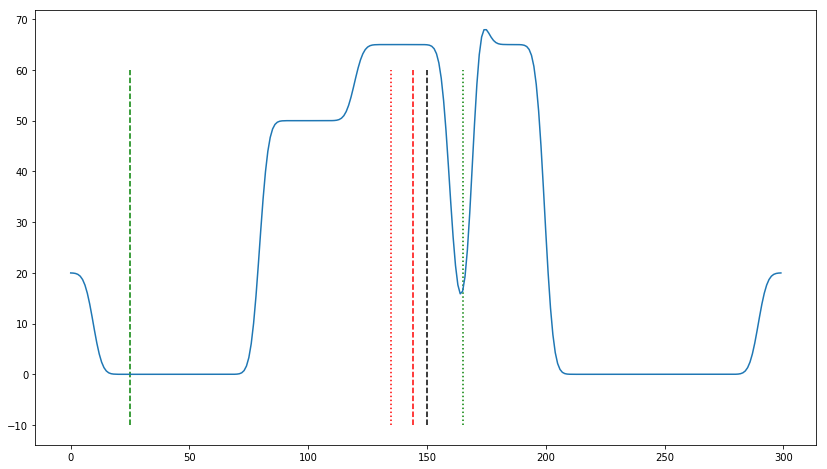

In [18]:
def ridge(grad, loc):
    peak_1, valley_1 = improc.follow_edge(grad, loc)
    if peak_1-valley_1 > 0:
        loc2 = peak_1 + 1
    else:
        loc2 = peak_1 - 1
    peak_2, valley_2 = improc.follow_edge(grad, loc2)
    return peak_1, peak_2, valley_1, valley_2

loc = 150
p1, p2, v1, v2 = ridge(grad, loc)

figure(figsize=(14,8))
plt.plot(line)
plt.vlines(x=loc, ymin=-10,ymax=60, color='k', linestyle='dashed')

plt.vlines(x=p1,ymin=-10,ymax=60, color='r', linestyle='dotted')
plt.vlines(x=p2,ymin=-10,ymax=60, color='r', linestyle='dashed')

plt.vlines(x=v1,ymin=-10,ymax=60, color='g', linestyle='dotted')
plt.vlines(x=v2,ymin=-10,ymax=60, color='g', linestyle='dashed');

In [19]:
# The nice thing about this method is that we can subdivide a range into smaller trenches or ridges by rejecting lots of false-positive edges which would classically be considered valid:
# TODO :)

def trenches(grad, seeds):
    TODO()
    
def ridges(grad, seeds):
    TODO()